## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [2]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [15]:
df = pd.read_csv("QueryResults.csv", names=['DATE', 'TAG', 'POSTS'])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [16]:
df

,DATE,TAG,POSTS
0,m,TagName,NaN
1,2008-07-01 00:00:00,c#,3.0
2,2008-08-01 00:00:00,assembly,8.0
3,2008-08-01 00:00:00,c,83.0
4,2008-08-01 00:00:00,c#,503.0
...,...,...,...
2659,2024-07-01 00:00:00,php,1043.0
2660,2024-07-01 00:00:00,python,6092.0
2661,2024-07-01 00:00:00,r,1148.0
2662,2024-07-01 00:00:00,ruby,99.0


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [17]:
df.shape

(2664, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [18]:
for col in df.columns:
    print(col, df[col].count())

DATE 2664
TAG 2664
POSTS 2663


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [19]:
df.groupby('TAG').sum(numeric_only=True).sort_values(by=['POSTS'], ascending=False)

,POSTS
TAG,
javascript,2531932.0
python,2203940.0
java,1918990.0
c#,1619896.0
php,1466551.0
c++,809792.0
r,508247.0
c,405563.0
swift,334655.0


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [20]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
TagName,1,0
assembly,192,192
c,192,192
c#,193,193
c++,192,192
delphi,192,192
go,177,177
java,192,192
javascript,192,192


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [38]:
type(df['DATE'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [39]:
df

,DATE,TAG,POSTS
1,2008-07-01,c#,3.0
2,2008-08-01,assembly,8.0
3,2008-08-01,c,83.0
4,2008-08-01,c#,503.0
5,2008-08-01,c++,164.0
...,...,...,...
2659,2024-07-01,php,1043.0
2660,2024-07-01,python,6092.0
2661,2024-07-01,r,1148.0
2662,2024-07-01,ruby,99.0


## Data Manipulation



In [40]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [41]:
reshaped_df.shape

(193, 14)

In [42]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [43]:
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,503.0,164.0,13.0,NaN,222.0,161.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1127.0,633.0,130.0,474.0,536.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,806.0,112.0,NaN,1147.0,722.0,128.0,604.0,505.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01,139.0,734.0,2581.0,1334.0,98.0,324.0,2813.0,4706.0,47.0,1361.0,7357.0,1686.0,139.0,721.0
2024-04-01,184.0,733.0,2724.0,1307.0,105.0,302.0,2569.0,4241.0,26.0,1178.0,7319.0,1532.0,114.0,686.0
2024-05-01,178.0,663.0,2478.0,1426.0,101.0,270.0,2256.0,3986.0,38.0,1148.0,6885.0,1376.0,117.0,613.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [48]:
# for col in reshaped_df.columns:
#     print(f"{col} \t {reshaped_df[col].count()}")
reshaped_df.count()

TAG
assembly      192
c             192
c#            193
c++           192
delphi        192
go            177
java          192
javascript    192
perl          192
php           192
python        192
r             190
ruby          192
swift         183
dtype: int64

In [49]:
reshaped_df.fillna(0, inplace=True)

In [56]:
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,503.0,164.0,13.0,0.0,222.0,161.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1127.0,633.0,130.0,474.0,536.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,806.0,112.0,0.0,1147.0,722.0,128.0,604.0,505.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,734.0,140.0,0.0,954.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01,139.0,734.0,2581.0,1334.0,98.0,324.0,2813.0,4706.0,47.0,1361.0,7357.0,1686.0,139.0,721.0
2024-04-01,184.0,733.0,2724.0,1307.0,105.0,302.0,2569.0,4241.0,26.0,1178.0,7319.0,1532.0,114.0,686.0
2024-05-01,178.0,663.0,2478.0,1426.0,101.0,270.0,2256.0,3986.0,38.0,1148.0,6885.0,1376.0,117.0,613.0


In [51]:
reshaped_df.isna().any()

TAG
assembly      False
c             False
c#            False
c++           False
delphi        False
go            False
java          False
javascript    False
perl          False
php           False
python        False
r             False
ruby          False
swift         False
dtype: bool

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [53]:
import matplotlib.pyplot as plt

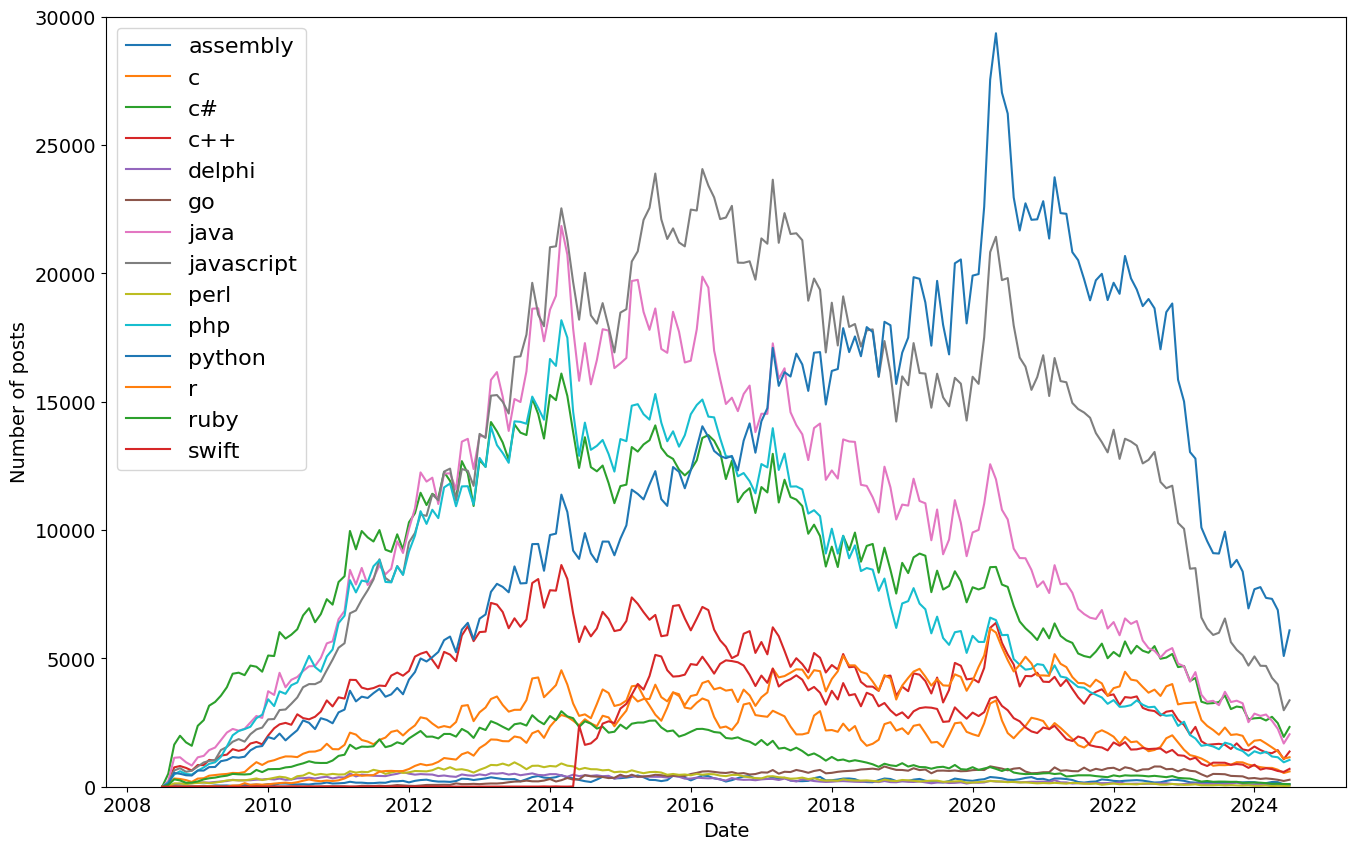

In [74]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of posts", fontsize=14)
plt.ylim((0, 30000))
for col in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[col], label=reshaped_df[col].name)
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [77]:
roll_df = reshaped_df.rolling(window=12).mean()

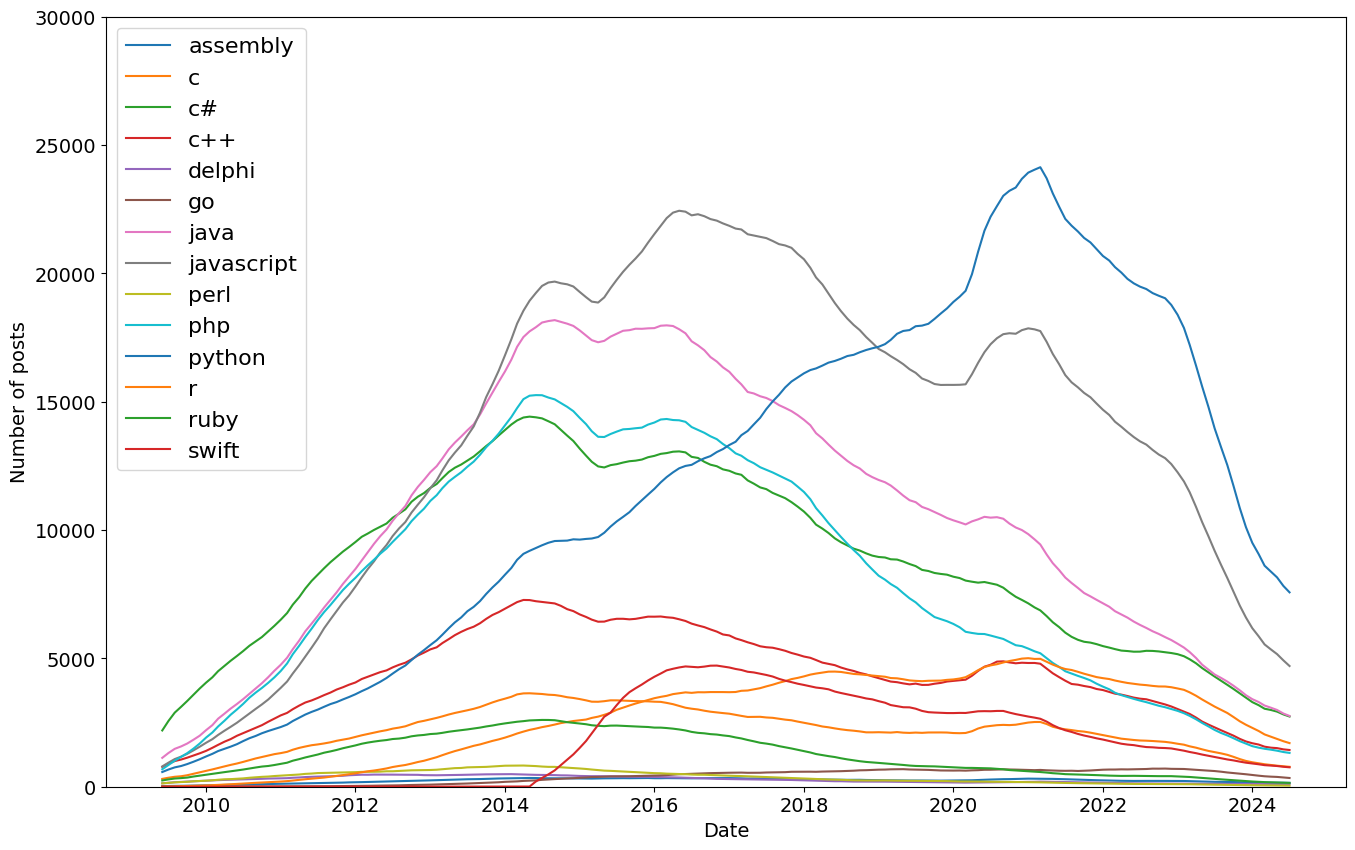

In [78]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of posts", fontsize=14)
plt.ylim((0, 30000))
for col in roll_df.columns:
    plt.plot(roll_df.index, roll_df[col], label=roll_df[col].name)
plt.legend(fontsize=16)